In [99]:
# libraries 
import numpy as np
import statsmodels.api as sm
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression
from statsmodels.stats.anova import anova_lm
from scipy import stats
import statsmodels
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns

In [100]:
# data
df = pd.read_csv('cur_us_owid_covid_monthly_copy.csv')
pd.set_option('display.max_columns', None)
df = df.dropna()
#df.shape[0]
df.head(5)

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,positive_rate,stringency_index,cci,cci_cur,cci_exp,umsent,umsent_cur,umsent_exp,ism_man,ism_non,cci_lag1,cci_lag2,cci_lag3,cci_lag4,cci_lag5,cci_lag6,cci_lag7,cci_lag8,total_cases_lag1,total_cases_lag2,total_deaths_lag1,total_deaths_lag2,VaxFull,VaxFul_sq,umsent_stan,umsent_mean,total_cases_stan_start_one,total_cases_stan_start_start,total_cases_mean_start_one,total_cases_mean_start_start,total_deaths_stan_start_one,total_deaths_stan_start_start,VaxFull_stan_start_one,VaxFull_stan_start_start,VaxFull_mean_start_one,VaxFull_mean_start_start,cci_stan,cci_mean,stringency_index_stan_start_one,stringency_index_stan_start_start,stringency_index_mean_start_one,stringency_index_mean_start_start,cci_lag1_stan,cci_lag1_mean,cpi,gdp,uenm,sp500,cci.1,covid
833,7/1/97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.3,154.5,107.6,107.1,114.0,102.6,57.7,56.7,129.9,127.9,118.5,118.5,118.9,118.7,114.2,109.5,0.0,0.0,0.0,0.0,0.0,0.0,1.201245,16.781599,-0.173327,0.0,-1929931.764,0.0,-0.189909,0.0,-0.166257,0.0,-1.604524,0.0,1.255048,30.820758,-0.210917,0.0,-2.460552,0.0,1.401052,34.432343,167.2,2166497.0,5.0,891.030029,126.3,0
834,8/1/97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127.6,156.1,108.7,104.4,110.7,100.3,56.3,62.0,126.3,129.9,127.9,118.5,118.5,118.9,118.7,114.2,0.0,0.0,0.0,0.0,0.0,0.0,0.965027,13.481599,-0.173327,0.0,-1929931.764,0.0,-0.189909,0.0,-0.166257,0.0,-1.604524,0.0,1.307985,32.120758,-0.210917,0.0,-2.460552,0.0,1.254568,30.832343,167.4,2166497.0,4.8,947.140015,127.6,0
835,9/1/97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.2,157.6,111.9,106.0,114.1,100.7,53.9,56.2,127.6,126.3,129.9,127.9,118.5,118.5,118.9,118.7,0.0,0.0,0.0,0.0,0.0,0.0,1.208403,16.881599,-0.173327,0.0,-1929931.764,0.0,-0.189909,0.0,-0.166257,0.0,-1.604524,0.0,1.413860,34.720758,-0.210917,0.0,-2.460552,0.0,1.307465,32.132343,167.7,2166497.0,4.7,927.580017,130.2,0
836,10/1/97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.4,147.5,107.3,105.6,109.8,102.8,56.4,56.6,130.2,127.6,126.3,129.9,127.9,118.5,118.5,118.9,0.0,0.0,0.0,0.0,0.0,0.0,0.900604,12.581599,-0.173327,0.0,-1929931.764,0.0,-0.189909,0.0,-0.166257,0.0,-1.604524,0.0,1.136958,27.920758,-0.210917,0.0,-2.460552,0.0,1.413259,34.732343,168.1,2237911.0,4.4,955.409973,123.4,0
837,11/1/97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128.1,156.8,108.9,107.2,114.9,102.3,55.7,58.5,123.4,130.2,127.6,126.3,129.9,127.9,118.5,118.5,0.0,0.0,0.0,0.0,0.0,0.0,1.265668,17.681599,-0.173327,0.0,-1929931.764,0.0,-0.189909,0.0,-0.166257,0.0,-1.604524,0.0,1.328346,32.620758,-0.210917,0.0,-2.460552,0.0,1.136567,27.932343,168.4,2237911.0,4.3,938.989990,128.1,0


Pull max historical data for cci = cpi + gdp + unemployment + ism_man + ism_non + stock returns + covid dummy

In [101]:
import pandas_datareader as pdr
import datetime

In [102]:
# start = datetime.datetime(1900,1,1)
# end = datetime.datetime.today()

#df = pdr.DataReader('CPILEGSL', 'fred', start, end)
#df1 = pdr.DataReader('NA000334Q', 'fred', start, end)
#df2 = pdr.DataReader('UNRATENSA', 'fred', start, end)
# df3 = pdr.DataReader('SP500', 'fred', start, end)

In [103]:
# df5 = pd.concat([df,df1,df2,df3], axis=1)

In [104]:
# test = df5.to_csv('dind.csv', encoding='utf-8')

--------------------------------------------------------------------------------

In [105]:
# pf = pd.read_csv('dind.csv', encoding='utf-8')

In [106]:
import pandas_datareader as pdr
import datetime as dt

ticker = "^GSPC"
start = dt.datetime(1900, 1, 1)
end = dt.datetime(2022, 11, 19)
 
data = pdr.get_data_yahoo(ticker, start, end)
print(data)

                   High          Low         Open        Close      Volume  \
Date                                                                         
1927-12-30    17.660000    17.660000    17.660000    17.660000           0   
1928-01-03    17.760000    17.760000    17.760000    17.760000           0   
1928-01-04    17.719999    17.719999    17.719999    17.719999           0   
1928-01-05    17.549999    17.549999    17.549999    17.549999           0   
1928-01-06    17.660000    17.660000    17.660000    17.660000           0   
...                 ...          ...          ...          ...         ...   
2022-11-08  3859.399902  3786.280029  3817.020020  3828.110107  4607640000   
2022-11-09  3818.199951  3744.219971  3810.939941  3748.570068  4645010000   
2022-11-10  3958.330078  3859.889893  3859.889893  3956.370117  5781260000   
2022-11-11  4001.479980  3944.820068  3963.719971  3992.929932  5593310000   
2022-11-14  4008.969971  3956.399902  3977.969971  3957.250000  

In [107]:
# df = data.to_csv('sp500.csv', encoding='utf-8')

--------------------------------------------------------------------------------

In [108]:

###############################################################################
# https://github.com/chris-santiago/steps 
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFE
np.set_printoptions(suppress=True)

In [109]:
# data
df = pd.read_csv('cur_us_owid_covid_monthly.csv')
pd.set_option('display.max_columns', None)
df = df.dropna()
df.shape[0]

300

In [110]:
# headers
for pred in df.columns:
    print(pred)

date
total_cases
new_cases
new_cases_smoothed
total_deaths
new_deaths
positive_rate
stringency_index
cci
cci_cur
cci_exp
umsent
umsent_cur
umsent_exp
ism_man
ism_non
cci_lag1
cci_lag2
cci_lag3
cci_lag4
cci_lag5
cci_lag6
cci_lag7
cci_lag8
total_cases_lag1
total_cases_lag2
total_deaths_lag1
total_deaths_lag2
VaxFull
VaxFul_sq
umsent_stan
umsent_mean
total_cases_stan_start_one
total_cases_stan_start_start
total_cases_mean_start_one
total_cases_mean_start_start
total_deaths_stan_start_one
total_deaths_stan_start_start
VaxFull_stan_start_one
VaxFull_stan_start_start
VaxFull_mean_start_one
VaxFull_mean_start_start
cci_stan
cci_mean
stringency_index_stan_start_one
stringency_index_stan_start_start
stringency_index_mean_start_one
stringency_index_mean_start_start
cci_lag1_stan
cci_lag1_mean
cpi
gdp
uenm
sp500
cci.1
covid


In [111]:
# df.dtypes

"Search algorithms that are used to reduce an initial d-dimensional feature space to a k-dimensional feature subspace where k < d. The motivation behind feature selection algorithms is to automatically select a subset of features most relevant to the problem. The goal of feature selection is two-fold: We want to improve the computational efficiency and reduce the model's generalization error by removing irrelevant features or noise. In addition, a wrapper approach such as sequential feature selection is advantageous if embedded feature selection -- for example, a regularization penalty like LASSO -- is not applicable.

In a nutshell, SFAs remove or add one feature at a time based on the classifier performance until a feature subset of the desired size k is reached."
http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/

In [112]:
# best subset selection -- forward
y=df['cci']
x=df[['cpi', 'gdp', 'uenm', 'sp500', 'stringency_index', 'positive_rate', 'total_cases', 'total_deaths', 'ism_man', 'ism_non']]
model=LinearRegression()
sfs=SequentialFeatureSelector(model,direction='forward')
sfs.fit(x,y)
sfs.get_feature_names_out()

array(['uenm', 'stringency_index', 'positive_rate', 'total_cases',
       'total_deaths'], dtype=object)

In [113]:
# best subset selection -- forward
y=df['cci']
x=df[['cpi', 'gdp', 'uenm', 'sp500', 'stringency_index', 'positive_rate', 'total_cases', 'total_deaths', 'ism_man', 'ism_non']]
model=LinearRegression()
sfs=SequentialFeatureSelector(model,direction='backward')
sfs.fit(x,y)
sfs.get_feature_names_out()

array(['gdp', 'uenm', 'sp500', 'total_deaths', 'ism_non'], dtype=object)

"This searching algorithm adds or removes the feature candidate from the candidate subset while evaluating the objective function or criterion. Sequential searches follow only one direction: either it increases the number of features in the subset or reduces the number of features in the candidate feature subset."
https://analyticsindiamag.com/a-complete-guide-to-sequential-feature-selection/

In [114]:
# RFE - recursive feature elimination
rfe = RFE(model)             
rfe = rfe.fit(x, y)
#        Variable     Selected       Ranking
list(zip(x.columns, rfe.support_, rfe.ranking_))

[('cpi', True, 1),
 ('gdp', False, 5),
 ('uenm', True, 1),
 ('sp500', False, 3),
 ('stringency_index', True, 1),
 ('positive_rate', True, 1),
 ('total_cases', False, 6),
 ('total_deaths', False, 4),
 ('ism_man', False, 2),
 ('ism_non', True, 1)]

In [115]:
# based off of all of the columns
rfe_columns = x.columns[rfe.support_]
rfe_columns

Index(['cpi', 'uenm', 'stringency_index', 'positive_rate', 'ism_non'], dtype='object')

In [116]:
# From forward selector
x2 = df[[ 'sp500', 'uenm', 'ism_non', 'total_deaths', 'gdp']]
x2 = sm.add_constant(x2)
y2 = df['cci']
       
# Build the model with RFE features
model2 = sm.OLS(y2,x2).fit()

#Summary of linear model
print(model2.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.876    
Dependent Variable: cci              AIC:                2222.0078
Date:               2022-11-15 01:01 BIC:                2244.2305
No. Observations:   300              Log-Likelihood:     -1105.0  
Df Model:           5                F-statistic:        424.2    
Df Residuals:       294              Prob (F-statistic): 4.01e-132
R-squared:          0.878            Scale:              94.540   
------------------------------------------------------------------
                 Coef.   Std.Err.    t     P>|t|   [0.025  0.975] 
------------------------------------------------------------------
const           112.6214   9.6227  11.7038 0.0000 93.6833 131.5594
sp500             0.0474   0.0021  22.2877 0.0000  0.0432   0.0516
uenm             -5.6260   0.3691 -15.2428 0.0000 -6.3524  -4.8996
ism_non           0.9488   0.1642   5.7778 0.0000  0.6256   1.2719
total_deaths 

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


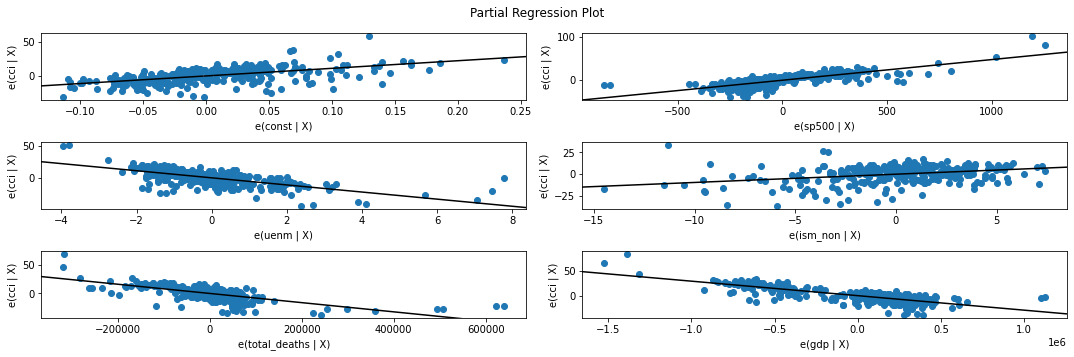

In [117]:
#define figure size
fig = plt.figure(figsize=(15,5))

#produce regression plots
# of y on one predictor variable with different graphs
# fig = sm.graphics.plot_regress_exog(mo, 'cci_lag1', fig=fig)
fig = sm.graphics.plot_partregress_grid(model2, fig=fig)
fig.tight_layout(pad=1.0)

In [118]:
# RESET Test
reset2 = smd.linear_reset(res=model2, power=2, test_type='fitted', use_f=True)
print(reset2)

<F test: F=11.377353164017732, p=0.0008434734681987159, df_denom=293, df_num=1>


/Users/mauricefreese/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/diagnostic.py:1081: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


In [119]:
# From forward selector
x = df[[ 'stringency_index', 'uenm', 'total_deaths']]
x = sm.add_constant(x)
y = df['cci']
       
# Build the model with RFE features
model = sm.OLS(y,x).fit()

#Summary of linear model
print(model.summary2())

                  Results: Ordinary least squares
Model:                OLS              Adj. R-squared:     0.692    
Dependent Variable:   cci              AIC:                2493.3490
Date:                 2022-11-15 01:01 BIC:                2508.1641
No. Observations:     300              Log-Likelihood:     -1242.7  
Df Model:             3                F-statistic:        225.1    
Df Residuals:         296              Prob (F-statistic): 4.92e-76 
R-squared:            0.695            Scale:              235.11   
--------------------------------------------------------------------
                  Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
--------------------------------------------------------------------
const            170.8126   3.0058  56.8275 0.0000 164.8971 176.7280
stringency_index   0.7201   0.0798   9.0238 0.0000   0.5630   0.8771
uenm             -12.9184   0.5012 -25.7726 0.0000 -13.9048 -11.9319
total_deaths      -0.0000   0.0000  -6.4603 0.0000  -

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


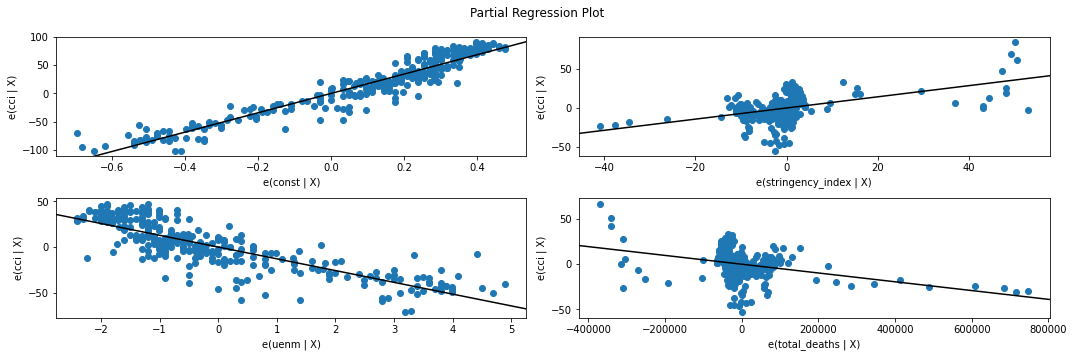

In [120]:
#define figure size
fig = plt.figure(figsize=(15,5))

#produce regression plots
# of y on one predictor variable with different graphs
# fig = sm.graphics.plot_regress_exog(mo, 'cci_lag1', fig=fig)
fig = sm.graphics.plot_partregress_grid(model, fig=fig)
fig.tight_layout(pad=1.0)

In [121]:
reset1 = smd.linear_reset(res=model, power=2, test_type='fitted', use_f=True)
print(reset1)

<F test: F=37.397205517763425, p=3.051391816568912e-09, df_denom=295, df_num=1>


/Users/mauricefreese/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/diagnostic.py:1081: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


In [122]:
# this equation is in a r format for the Ramsey's RESET test
sy = smf.ols('cci ~ stringency_index + uenm + total_cases', df)
mo = sy.fit()
print(mo.summary2())

                  Results: Ordinary least squares
Model:                OLS              Adj. R-squared:     0.688    
Dependent Variable:   cci              AIC:                2497.0407
Date:                 2022-11-15 01:01 BIC:                2511.8558
No. Observations:     300              Log-Likelihood:     -1244.5  
Df Model:             3                F-statistic:        221.1    
Df Residuals:         296              Prob (F-statistic): 3.04e-75 
R-squared:            0.691            Scale:              238.02   
--------------------------------------------------------------------
                  Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
--------------------------------------------------------------------
Intercept        169.9863   2.9955  56.7469 0.0000 164.0911 175.8815
stringency_index   0.6157   0.0704   8.7417 0.0000   0.4771   0.7543
uenm             -12.7758   0.4993 -25.5876 0.0000 -13.7584 -11.7932
total_cases       -0.0000   0.0000  -6.1323 0.0000  -

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


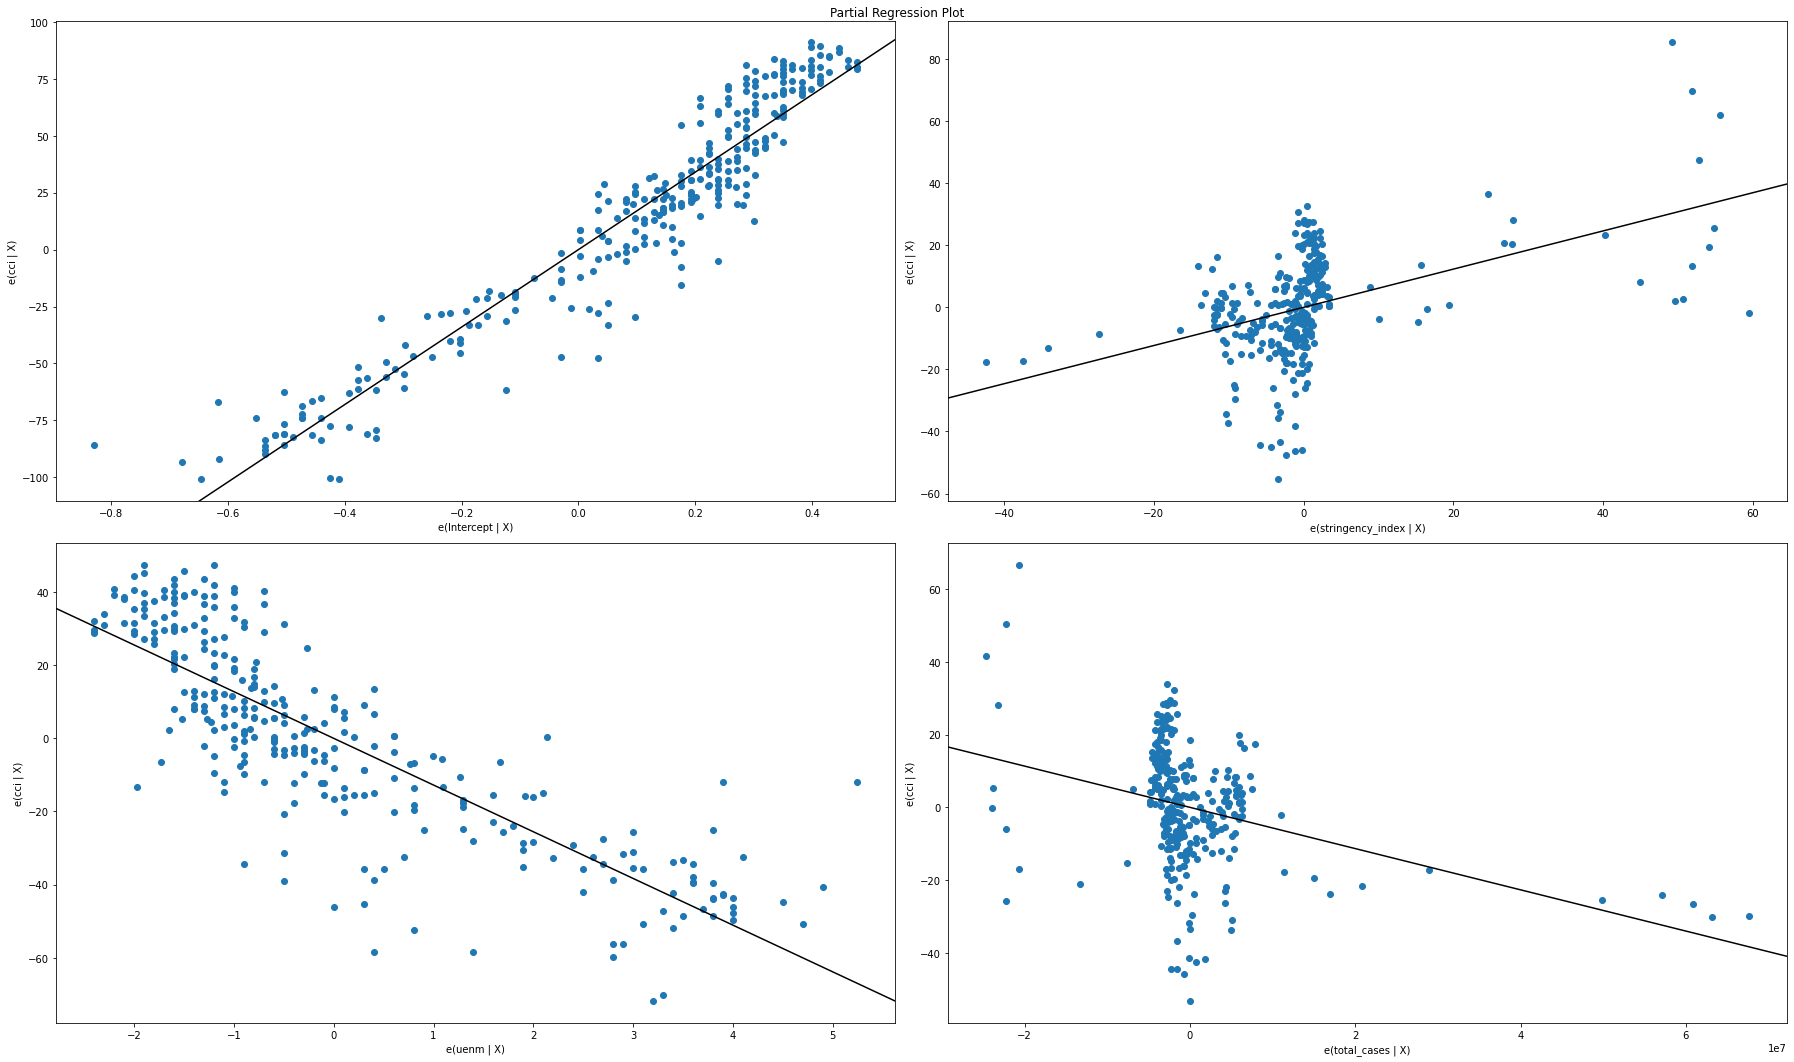

In [123]:
#define figure size
fig = plt.figure(figsize=(25,15))

#produce regression plots
# of y on one predictor variable with different graphs
# fig = sm.graphics.plot_regress_exog(mo, 'cci_lag1', fig=fig)
fig = sm.graphics.plot_partregress_grid(mo, fig=fig)
fig.tight_layout(pad=1.0)

In [124]:
import statsmodels.tools.tools as ct
import statsmodels.stats.diagnostic as smd

In [125]:
reset = smd.linear_reset(res=mo, power=2, test_type='fitted', use_f=True)
print(reset)

<F test: F=41.813254283121964, p=4.156937976423569e-10, df_denom=295, df_num=1>


/Users/mauricefreese/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/diagnostic.py:1081: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


<AxesSubplot: >

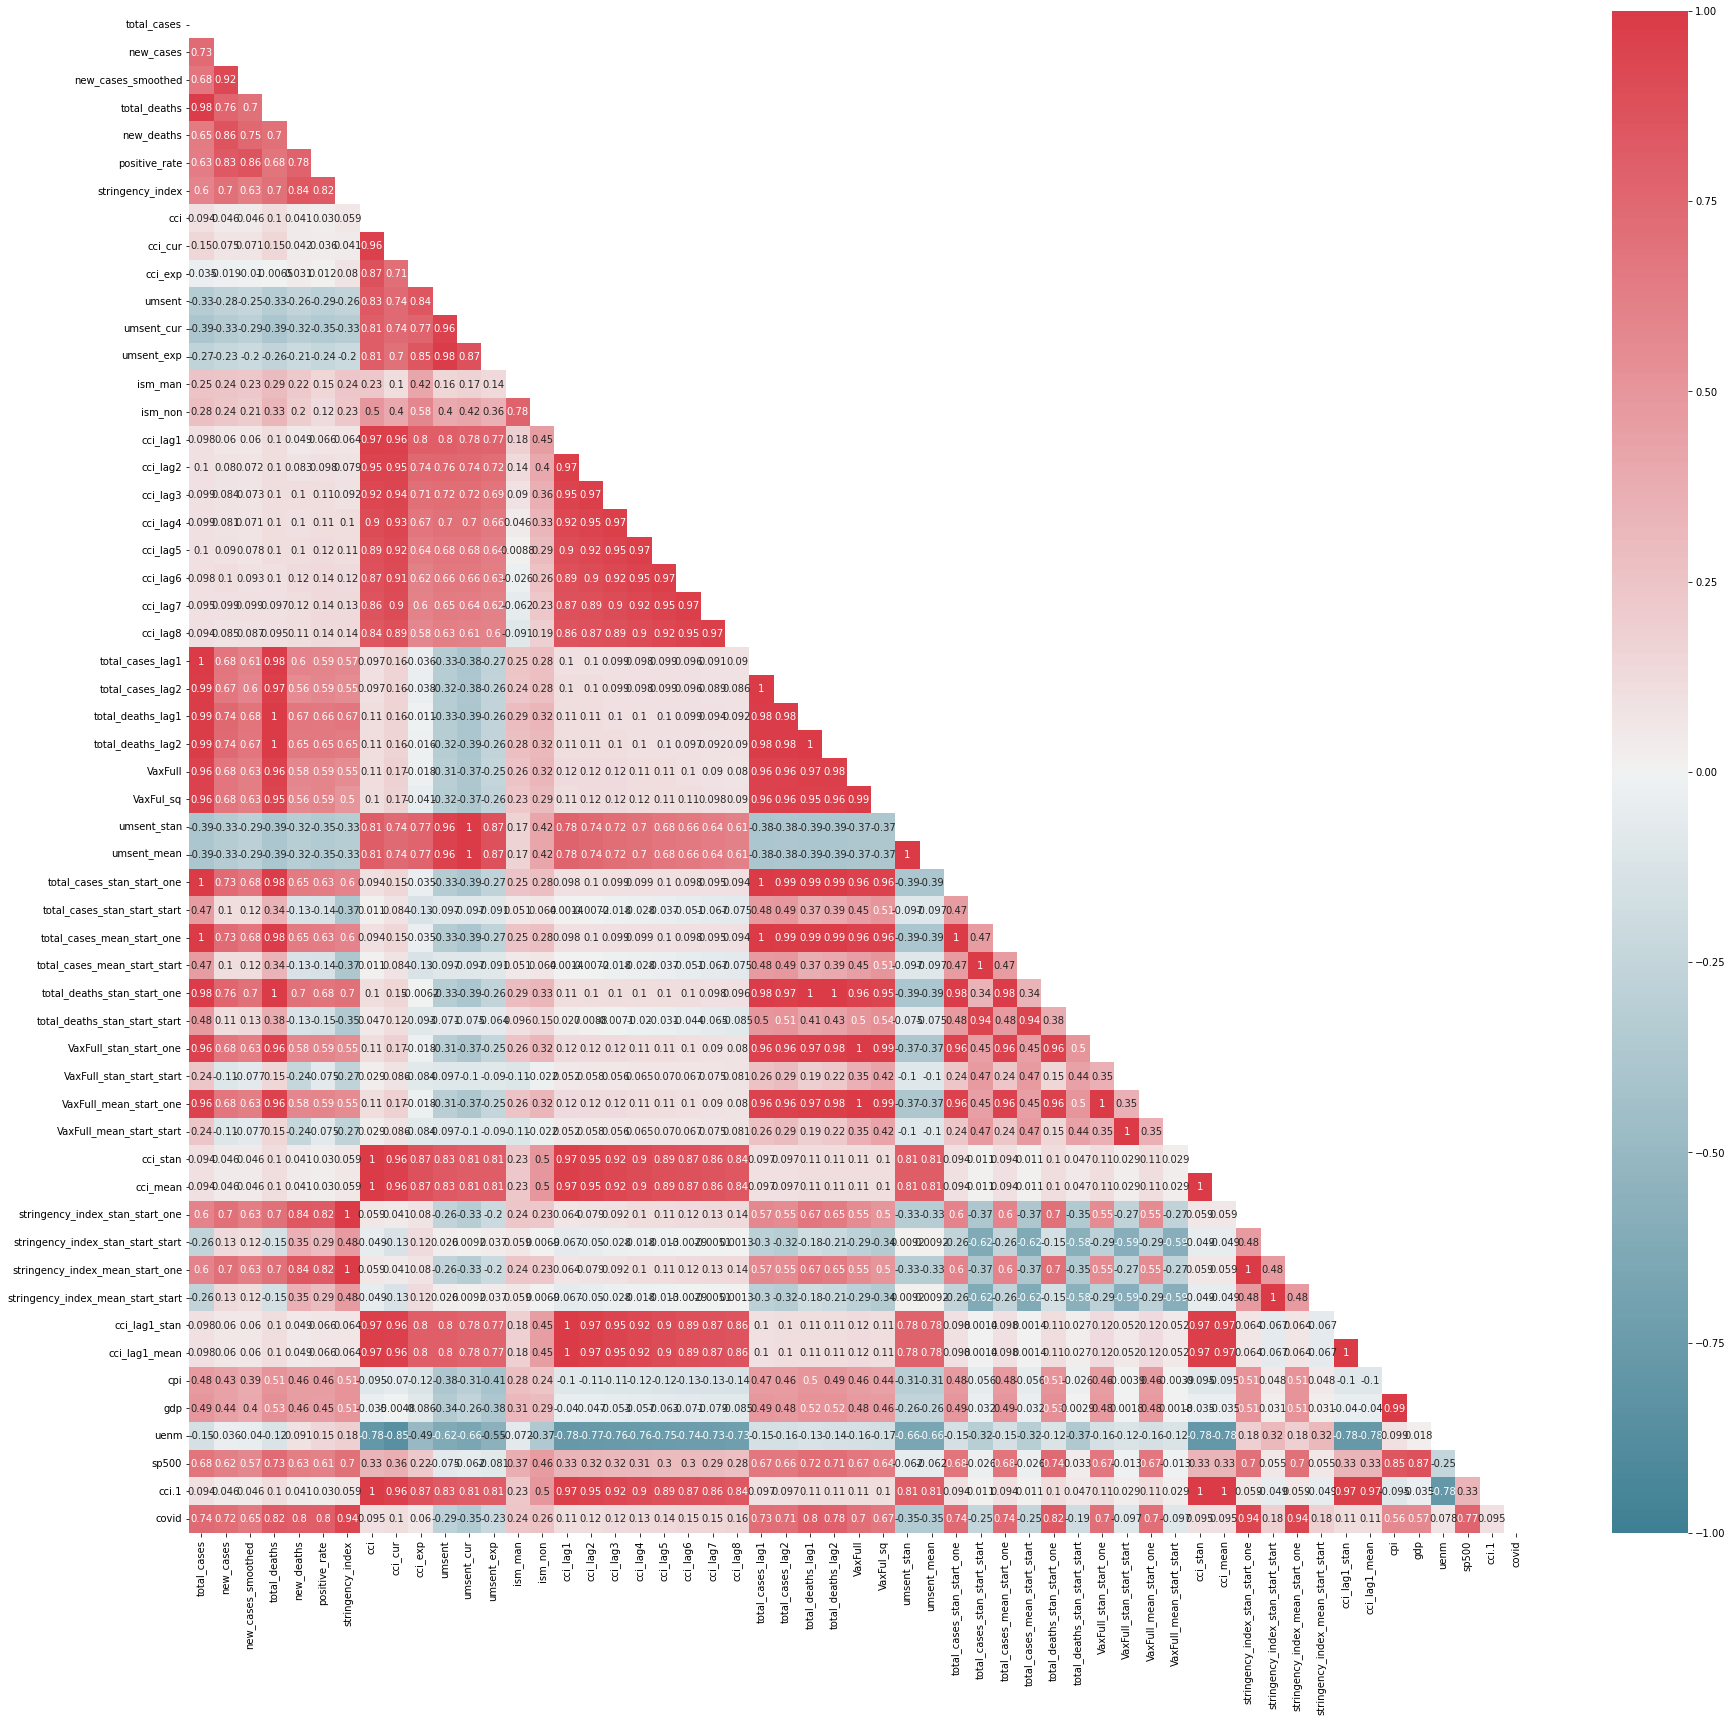

In [126]:
# correlation heat map -- 'red' = 1; dark gray/charcol = -1
import seaborn as sns
corr = df.corr()

f, ax = plt.subplots(figsize=(30, 28))
mask = np.triu(np.ones_like(corr, dtype = bool))
corr = df.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0, ax=ax, annot = True, mask = mask)

In [127]:
pg = df.corr() 
# pg.to_csv('core.csv')
# pg